### Level 1: Loading the Required Packages

To proceed with reading the data, performing numerical operations, and visualizing relationships, we need the following libraries:

- **pandas** – for reading and handling CSV files  
- **numpy** – for working with arrays and numerical transformations  
- **matplotlib** – for plotting and visual exploration of the data  

**Installation (run once):**

```bash
pip install pandas numpy matplotlib
```
### Dataset Introduction – The Classic Advertising Dataset  
This is the famous Advertising dataset from the book Introduction to Statistical Learning (ISLR).  
- All monetary values are in thousands of dollars  
- TV – advertising budget spent on television  
- Radio – advertising budget spent on radio  
- Newspaper – advertising budget spent on newspapers  
- Sales – actual sales (target variable)  


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### Level 2: Loading and Initial Inspection of the Dataset  
**Loading the Dataset**  
Reads the CSV file and stores it in a pandas DataFrame called `df`.  
(If your file has a different name or path, adjust the string accordingly.)

In [21]:
df = pd.read_csv("/home/pyrz-tech/Desktop/MachineLearning/advertising.csv")

**Preview the First Rows**  
‍`df.head()`Displays the first 5 rows of the DataFrame, allowing a quick visual verification of the loaded data.

In [22]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


**Dataset Dimensions**   
`df.shape` Returns the total number of rows and columns in the dataset.

In [23]:
df.shape

(200, 4)

**Column Information**  
`df.info()` Shows column names, data types, non-null counts, and memory usage.

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


**Descriptive Statistics**  
`df.describe()` Provides summary statistics (count, mean, std, min, quartiles, max) for numerical columns.


In [25]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000



### Quick Summary of What We’ve Seen So Far  
After running the basic checks, we confirmed:  
- Shape: 200 rows × 4 columns
- All feature columns (TV, Radio, Newspaper) and the target (Sales) are of type float64  
- No missing values  

### Visual Inspection of Individual Feature–Sales Relationships  
We now carefully examine the relationship between each advertising channel and Sales using individual scatter plots with regression lines. The goal is to visually assess:  
- Strength of the linear relationship  
- Density and spread of points around the fitted line  
- Which feature appears to have the strongest and most compact linear relationship with Sales

#### Visual Inspection Using Matplotlib’s scatter() Method  
We now plot the relationship between each advertising feature and Sales using pure **matplotlib.scatter()** (no seaborn regplot) so that we can fully control the appearance and clearly see the raw data points.

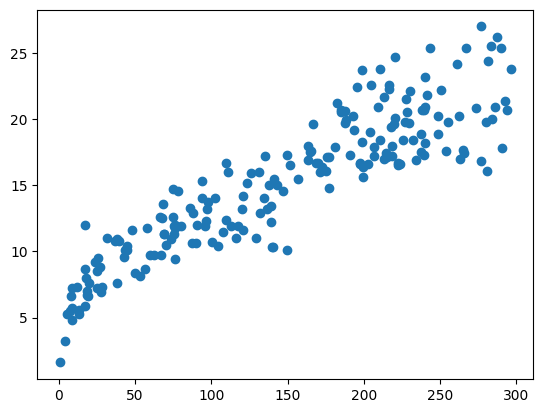

In [74]:
plt.scatter(df.TV, df.Sales)

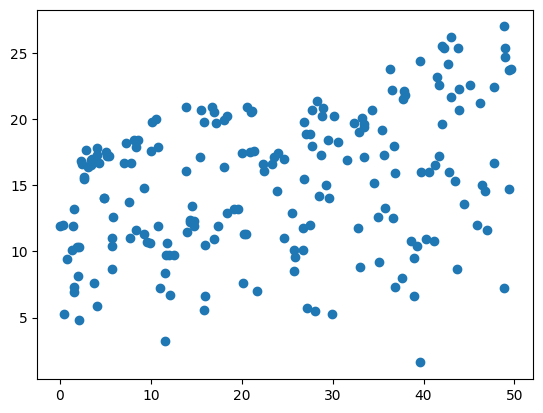

In [78]:
plt.scatter(df.Radio, df.Sales)

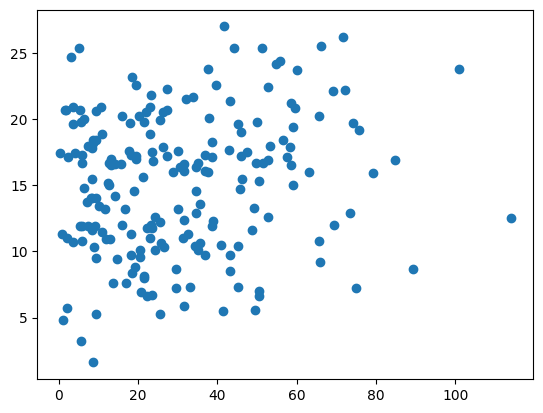

In [77]:
plt.scatter(df.Newspaper, df.Sales)

### Visual Analysis Summary and Feature Selection for Simple Linear Regression  

As observed in the scatter plots above:  

- All three advertising channels (TV, Radio, Newspaper) show a positive relationship with Sales.  
- The TV advertising budget exhibits the strongest, most densely clustered, and clearest linear relationship with Sales.  
- The TV feature has the steepest slope, the tightest spread around the trend, and the fewest apparent outliers.  

Therefore, based on visual inspection and exploratory analysis, we select TV as the single predictor variable for our Simple Linear Regression model.

#### Selected Feature  
**Feature:**   `TV`   
**Target:**   `Sales`

### Creating a Clean Subset for Focused Analysis  

To work more cleanly and concentrate only on the selected feature (TV) and the target (Sales), we create a new DataFrame called `cdf` (clean DataFrame) containing just these two columns.

From now on, we will perform all subsequent steps (visualization, modeling, evaluation) using `cdf` instead of the full `df`. This keeps our workspace focused and readable.

In [79]:
cdf = df[['TV', 'Sales']]

### Train-Test Split (Manual Random Split)  

We now split the clean dataset (`cdf`) into training and test sets using a simple random mask.  
Approximately 80 % of the data will be used for training and the remaining 20 % for testing.

This is a common manual approach when we want full control over the splitting process without importing `train_test_split` from scikit-learn.

`train` and `test` DataFrames are ready for model training and evaluation.  

In [96]:
msk = np.random.rand(len(cdf)) < 0.8
train = cdf[msk]
test = cdf[~msk]

print(f'msk => {msk[:4]} ...')
print(f'train => {train.head()}')
print('...')
print(f'test => {test.head()} ...')
print('...')
print(f'len(train) => {len(train)}')
print(f'len(test) => {len(test)}')

msk => [ True  True  True False] ...
train =>       TV  Sales
0  230.1   22.1
1   44.5   10.4
2   17.2   12.0
5    8.7    7.2
6   57.5   11.8
...
test =>        TV  Sales
3   151.5   16.5
4   180.8   17.9
8     8.6    4.8
9   199.8   15.6
10   66.1   12.6 ...
...
len(train) => 156
len(test) => 44


 ### Visualizing the Training and Test Sets on the Same Plot  

Before training the model, we plot both the training and test data points on the same scatter plot (with different colors) to visually confirm that:  
- The split appears random  
- Both sets cover the same range of TV and Sales values  
- There is no systematic bias in the split


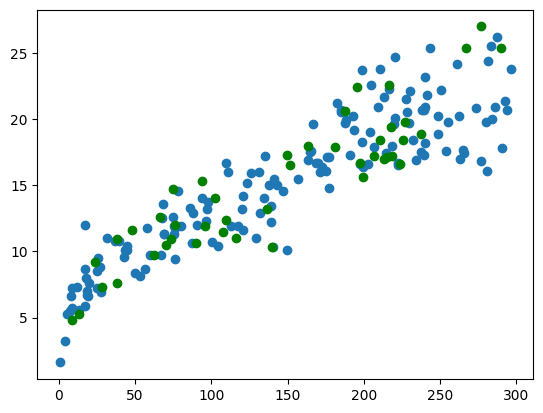

In [98]:
plt.scatter(train.TV, train.Sales)
plt.scatter(test.TV, test.Sales, color='green')

 #### Converting Training Data to NumPy Arrays  

For the scikit-learn LinearRegression model, we need the feature and target variables as NumPy arrays (or array-like objects).  
We use `np.asanyarray()` to convert the pandas columns from the training set into the required format.

In [82]:
train_x = np.asanyarray(train[['TV']])
train_y = np.asanyarray(train[['Sales']])

### Fitting the Simple Linear Regression Model  

We now import the LinearRegression class from scikit-learn, create a model instance, and train it using the prepared training arrays (train_x and train_y).

After running, the simple linear regression model is fully trained using only the TV advertising budget to predict Sales.  
The coefficient tells us how much Sales increases (in thousand units) for every additional thousand dollars spent on TV advertising.

In [83]:
from sklearn.linear_model import LinearRegression

In [84]:
reg = LinearRegression()
reg.fit(train_x, train_y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


### Visualizing the Fitted Regression Line  

In this step we plot the training data points together with the regression line found by the model. This allows us to visually verify that the fitted line reasonably captures the linear relationship between TV advertising and Sales.  

The line is drawn using the learned parameters:  
- `model.coef_[0]` → slope of the line  
- `model.intercept_` → y-intercept  

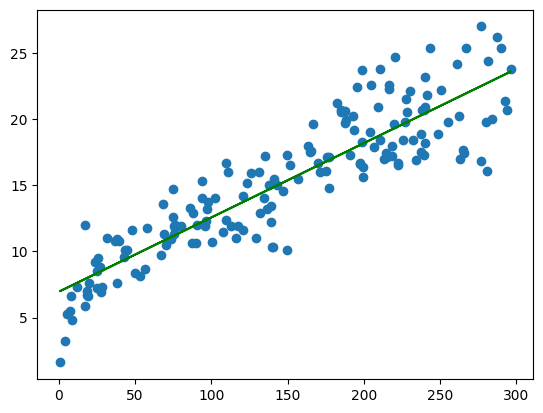

In [85]:
plt.scatter(train_x, train_y)
plt.plot(train_x, reg.coef_[0][0] * train_x + reg.intercept_[0], '-g')

### Preparing Test Data and Making Predictions  

We convert the test set to NumPy arrays (required format for scikit-learn) and use the trained model to predict Sales values for the test observations.

In [86]:
test_x = np.asanyarray(test[['TV']])
test_y = np.asanyarray(test[['Sales']])
predict_y = np.asanyarray(reg.predict(test_x))

### Evaluating Model Performance with R² Score  

We import the `r2_score` metric from scikit-learn to measure how well our Simple Linear Regression model performs on the test set.  
The R² score (coefficient of determination) tells us the proportion of variance in Sales that is explained by the TV advertising budget.
    
- R² ≈ 1.0 → perfect fit  
- R² ≈ 0 → model explains nothing  

In [87]:
from sklearn.metrics import r2_score

### Computing and Displaying the R² Score  

We use the imported `r2_score` function to calculate the coefficient of determination on the test data and print the result directly.

This single line gives us the final performance metric: the higher the value (closer to 1.0),
the better our simple linear regression model using only TV advertising explains the variation in Sales.

In [88]:
print(f'r^2 score is : {r2_score(test_y, predict_y)}')

r^2 score is : 0.8674734235783073
